<a href="https://colab.research.google.com/github/punitarani/MAT-494/blob/master/2.3%20Independent%20Variables%20and%20Random%20Samples.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 2.3 Independent Variables and Random Samples

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import datasets

In [2]:
plt.style.use("seaborn-notebook")

## Load Linnerud Dataset

The Linnerud dataset is a multi-output regression dataset. It consists of three exercise (data) and three physiological (target) variables collected from twenty middle-aged men in a fitness club:
* **Physiological** - CSV containing 20 observations on 3 physiological variables:
    1. Weight
    2. Waist
    3. Pulse

* **Exercise** - CSV containing 20 observations on 3 exercise variables:
    1. Chins
    2. Situps
    3. Jumps

In [3]:
# Linnerud Dataset
ldata = datasets.load_linnerud(as_frame=True)

# Physiological DataFrame
pdf: pd.DataFrame = ldata.target
# Exercise DataFrame
edf: pd.DataFrame = ldata.data

# Print DataFrame Shape, Columns and DataTypes
print("Physiological DataFrame Info")
print("Size: ", pdf.shape)
print("\nColumns and Data Types:")
print(pdf.dtypes)

print("\n\nExercise DataFrame Info")
print("Size: ", edf.shape)
print("\nColumns and Data Types:")
print(edf.dtypes)

Physiological DataFrame Info
Size:  (20, 3)

Columns and Data Types:
Weight    float64
Waist     float64
Pulse     float64
dtype: object


Exercise DataFrame Info
Size:  (20, 3)

Columns and Data Types:
Chins     float64
Situps    float64
Jumps     float64
dtype: object


## Plot Linnerud Dataset

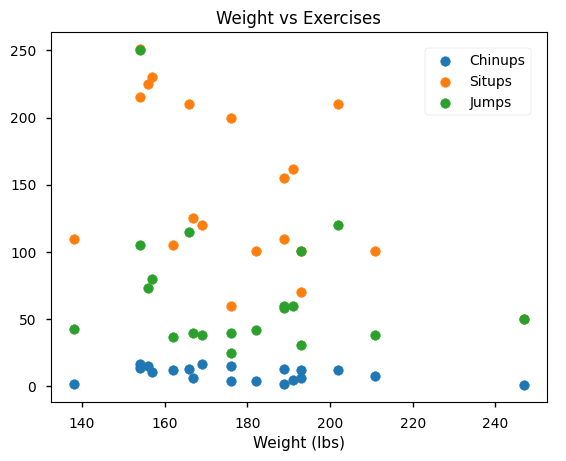

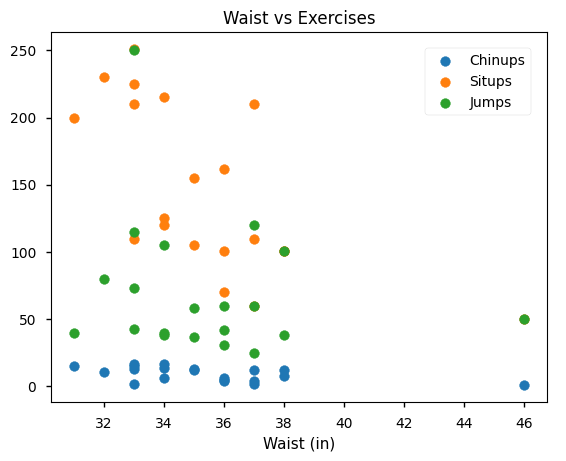

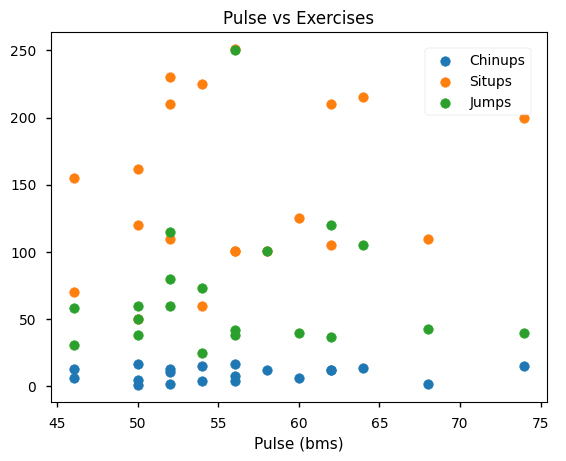

In [4]:
# Plot Weight against Exercise
wt_fig, wt_ax = plt.subplots(figsize=(6.4, 4.8))

wt_ax.scatter(pdf["Weight"], edf["Chins"])
wt_ax.scatter(pdf["Weight"], edf["Situps"])
wt_ax.scatter(pdf["Weight"], edf["Jumps"])

wt_ax.set_title("Weight vs Exercises")
wt_ax.set_xlabel("Weight (lbs)")
wt_fig.legend(["Chinups", "Situps", "Jumps"], loc=(0.75, 0.75))

plt.show()


# Plot Waist against Exercise
ws_fig, ws_ax = plt.subplots(figsize=(6.4, 4.8))

ws_ax.scatter(pdf["Waist"], edf["Chins"])
ws_ax.scatter(pdf["Waist"], edf["Situps"])
ws_ax.scatter(pdf["Waist"], edf["Jumps"])

ws_ax.set_title("Waist vs Exercises")
ws_ax.set_xlabel("Waist (in)")
ws_fig.legend(["Chinups", "Situps", "Jumps"], loc=(0.75, 0.75))

plt.show()


# Plot Pulse against Exercise
ps_fig, ps_ax = plt.subplots(figsize=(6.4, 4.8))

ps_ax.scatter(pdf["Pulse"], edf["Chins"])
ps_ax.scatter(pdf["Pulse"], edf["Situps"])
ps_ax.scatter(pdf["Pulse"], edf["Jumps"])

ps_ax.set_title("Pulse vs Exercises")
ps_ax.set_xlabel("Pulse (bms)")
ps_fig.legend(["Chinups", "Situps", "Jumps"], loc=(0.75, 0.75))

plt.show()

## Correlation and Covariance

### Covariance

**It is the measure of joint variability of two random variables.**
* **Positive** indicates that Y will follow the same trend as X
* **(Near) Zero** indicates that Y does not depend on the trend of X
* **Negative** indicates that Y will follow the opposite trend as X

$ Cov(X,Y) = \frac {(X - \mu _X)(Y - \mu _Y)}{N} $

In [5]:
def cov(X, Y):
    """Calculate Covariance between X and Y"""
    n = len(X)
    mean_x = sum(X) / n
    mean_y = sum(Y) / n
    return sum([(x - mean_x) * (y - mean_y) for x, y in zip(X, Y)]) / (n-1)

### Correlation

**It is the measure of linear correlation between two variables**
* The **Signedness** is similar to that of the Covariance.
* The **Magnitude** indicates the strength of the trend

$ Corr(X,Y) = \rho_{X,Y} = \frac{Cov(X,Y)}{\sigma_X \sigma_Y} $

In [6]:
def corr(X, Y):
    """Calculate Correlation between X and Y"""
    n = len(X)
    mean_x = sum(X) / n
    mean_y = sum(Y) / n
    covxy = sum([(x - mean_x) * (y - mean_y) for x, y in zip(X, Y)]) / n
    return covxy / (np.std(X) * np.std(Y))

### Calculate Covariances and Correlation between target and data

In [7]:
covs = pd.DataFrame(index=pdf.columns, columns=edf.columns)
corrs = pd.DataFrame(index=pdf.columns, columns=edf.columns)

for p_col in pdf.columns:
    for e_col in edf.columns:
        covs.loc[p_col, e_col] = cov(pdf[p_col], edf[e_col])

for p_col in pdf.columns:
    for e_col in edf.columns:
        corrs.loc[p_col, e_col] = corr(pdf[p_col], edf[e_col])

print("Covariances")
print(covs)

print("\n\nCorrelations")
print(corrs)

Covariances
            Chins      Situps       Jumps
Weight -50.863158 -761.715789 -286.505263
Waist   -9.347368 -129.336842  -31.442105
Pulse    5.742105  101.521053   12.915789


Correlations
           Chins    Situps     Jumps
Weight -0.389694 -0.493084 -0.226296
Waist  -0.552232 -0.645598 -0.191499
Pulse   0.150648  0.225038  0.034933


### Compare against Pandas .cov() and .corr()

In [8]:
tcovs = pd.concat([pdf, edf], axis=1).cov().loc[pdf.columns, edf.columns]
tcorrs = pd.concat([pdf, edf], axis=1).corr().loc[pdf.columns, edf.columns]

print("Covariances")
print(tcovs)

print("\n\nCorrelations")
print(tcorrs)

Covariances
            Chins      Situps       Jumps
Weight -50.863158 -761.715789 -286.505263
Waist   -9.347368 -129.336842  -31.442105
Pulse    5.742105  101.521053   12.915789


Correlations
           Chins    Situps     Jumps
Weight -0.389694 -0.493084 -0.226296
Waist  -0.552232 -0.645598 -0.191499
Pulse   0.150648  0.225038  0.034933


### Linnerud Data Correlation Analysis

The covariances table highlights some noticeable trends and relationships between the variables.

**Weight is strongly inversely proportional to the exercise capability of the subjects.**
This can be noticed with the large negative covariances between weight and the 3 exercises (1st row).
This indicates that as the weight increases, the number of sets of exercise a person can do decreases.

**Waist and Pulse seem to have a negligible impact on Chinups and Jumps.**
This can be notices with the close-to-zero covariances between these variables.
This indicates that the person's ability to perform Chinups and Jumps does not depend on their waist size or resting pulse.

**Situps, however, seems to be strongly proportional to Pulse and inversely proportional to Waist size.**

## Central Limit Theorem

**The properly normalized sum of independent random variables will tend toward a normal distribution even if the original variables are not normally distributed**

Sample mean: $ \mu _{\bar x} = \mu$,

Sample standard deviation: $ \sigma _{\bar x} ^2 = \frac {\sigma ^2}{n} $

The larger the value of n, the better the approximation.

In [9]:
def clt(Y):
    """Central Limit Theorem"""
    n = len(Y)
    uy = np.mean(Y)
    sy = np.std(Y)
    return uy, sy/np.sqrt(n)

In [10]:
# Apply CLT
es = pd.DataFrame(index=edf.columns, columns=["mean", "std"])
eclts = pd.DataFrame(index=edf.columns, columns=["mean", "std"])

for ecol in edf.columns:
    # Raw
    es.loc[ecol, "mean"] = np.mean(edf[ecol])
    es.loc[ecol, "std"] = np.std(edf[ecol])

    # CLT
    eclt = clt(edf[ecol])
    eclts.loc[ecol, "mean"] = eclt[0]
    eclts.loc[ecol, "std"] = eclt[1]

print("Exercise DataFrame Mean and Std")
print(es)

print("\n\nCentral Limit Theorem of Exercise DataFrame")
print(eclts)

Exercise DataFrame Mean and Std
          mean        std
Chins     9.45   5.152427
Situps  145.55  60.982354
Jumps     70.3  49.979096


Central Limit Theorem of Exercise DataFrame
          mean        std
Chins     9.45   1.152118
Situps  145.55  13.636069
Jumps     70.3  11.175666
